### Social Network Analysis
#### Unit 3 - Project
##### Ricardo Armando Centeno Santos


In [36]:
#Importing libraries

import os
import requests 
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ast import literal_eval

In [3]:
#Register the CLIENT_ID AND THE CLIENT_SECRET

CLIENT_ID= 'd76cf43be0ee4c9a83981ad8014ff51b'
CLIENT_SECRET= 'f3a71da76e1a456ebb5bd0994ea4f429'
AUTH_URL = 'https://accounts.spotify.com/api/token'

In [4]:
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']
access_token

'BQAJuxXiPCwJFMYDib5UM7dIC6VQsFaOHoU77YkZMKyWlLpAQbeue3lwcziaG67rN-PQK4B4LMUCnA1Eg4wcMoOchE8HgIQcalTn0lDcpw8j8aYF2ko'

In [10]:
BASE_URL = 'https://api.spotify.com/v1/'
artist_id = '6FQqZYVfTNQ1pCqfkwVFEa?si=7oCpMF3FR_Kxr4fIodZbpw'  

r = requests.get(BASE_URL + 'artists/' + artist_id + '/related-artists' , headers=headers)

In [11]:
r = r.json()
r

{'external_urls': {'spotify': 'https://open.spotify.com/artist/6FQqZYVfTNQ1pCqfkwVFEa'},
 'followers': {'href': None, 'total': 1299093},
 'genres': ['indie rock', 'modern rock', 'oxford indie', 'rock'],
 'href': 'https://api.spotify.com/v1/artists/6FQqZYVfTNQ1pCqfkwVFEa',
 'id': '6FQqZYVfTNQ1pCqfkwVFEa',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5ebe7b5d168c13ddba810b430dd',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174e7b5d168c13ddba810b430dd',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178e7b5d168c13ddba810b430dd',
   'width': 160}],
 'name': 'Foals',
 'popularity': 65,
 'type': 'artist',
 'uri': 'spotify:artist:6FQqZYVfTNQ1pCqfkwVFEa'}

In [12]:
def auth_spotify(): 
    client_id = 'd76cf43be0ee4c9a83981ad8014ff51b'
    client_secret = 'f3a71da76e1a456ebb5bd0994ea4f429'

    client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
    return spotipy.Spotify(client_credentials_manager=client_credentials_manager, language='en')

In [13]:
def add_new_artist(artist_id, df):
    artist_info= spotify.artist(artist_id)
    
    related_artists= spotify.artist_related_artists(artist_id) 
    related_artist_ids= [artist['id'] for artist in related_artists['artists']] 
    related_artist_names= [artist['name'] for artist in related_artists['artists']] 
    
    row = pd.Series([artist_info["id"], artist_info["name"], artist_info["popularity"], artist_info["genres"], related_artist_ids, related_artist_names], index=df.columns)
    
    a= row.to_frame().T
    df  = df.append(a, ignore_index=True) 
    return df

In [14]:
artists_df = pd.DataFrame(columns=["id", "name", "popularity", "genres", "related_artist_ids", "related_artist_names"]) 
artist_id= '6FQqZYVfTNQ1pCqfkwVFEa' 

In [15]:
artists_df

Empty DataFrame
Columns: [id, name, popularity, genres, related_artist_ids, related_artist_names]
Index: []

In [16]:
spotify = auth_spotify()
artists_df= add_new_artist(artist_id, artists_df)
artists_df 

/tmp/ipykernel_9833/1744083500.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df  = df.append(a, ignore_index=True)


id   name popularity  \
0  6FQqZYVfTNQ1pCqfkwVFEa  Foals         65   

                                          genres  \
0  [indie rock, modern rock, oxford indie, rock]   

                                  related_artist_ids  \
0  [22RISwgVJyZu9lpqAcv1F5, 45FqwUG4hTT6d39r2HUsU...   

                                related_artist_names  
0  [Blossoms, Sea Girls, White Lies, Viola Beach,...

In [17]:
total_relaciones= len(artists_df["related_artist_names"][0]) 
total_relaciones

20

In [18]:
for i in range(total_relaciones):
    ids= artists_df["related_artist_ids"][i]
    names  = artists_df["related_artist_names"][i]
    
    for i, name in zip(ids, names):
        artists_df = add_new_artist(i, artists_df)

/tmp/ipykernel_9833/1744083500.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df  = df.append(a, ignore_index=True)


In [19]:
artists_df = artists_df.drop_duplicates(subset="id")

In [20]:
artists_df

id                     name popularity  \
0    6FQqZYVfTNQ1pCqfkwVFEa                    Foals         65   
1    22RISwgVJyZu9lpqAcv1F5                 Blossoms         58   
2    45FqwUG4hTT6d39r2HUsUe                Sea Girls         53   
3    6ssXMmc5EOUrauZxirM910               White Lies         57   
4    7DruTvBV7owt1aSAZHsU58              Viola Beach         45   
..                      ...                      ...        ...   
380  0IBAqjHG8DSaD7PPCGnGiZ             Babyshambles         43   
388  19t4krGrwyr10giUMdv8BK                The Twang         36   
393  14GEKKALFIO2oB9IdGXg2e  Reverend And The Makers         42   
396  721LNYldlmaLlKi0IQ5ClK          Little Man Tate         29   
397  6OiHleP2bHM18dXq4aZQWt                The Coral         52   

                                                genres  \
0        [indie rock, modern rock, oxford indie, rock]   
1              [english indie rock, modern rock, rock]   
2    [english indie rock, modern alternative rock, ...   
3    [alternative dance, indie rock, modern rock, n...   
4    [english indie rock, modern alternative rock, ...   
..                                                 ...   
380                                                 []   
388    [birmingham indie, british indie rock, britpop]   
393                         [britpop, sheffield indie]   
396              [british indie rock, sheffield indie]   
397                       [britpop, modern rock, rock]   

                                    related_artist_ids  \
0    [22RISwgVJyZu9lpqAcv1F5, 45FqwUG4hTT6d39r2HUsU...   
1    [4fgXfJCQnK6c44u4KzAtQP, 45FqwUG4hTT6d39r2HUsU...   
2    [4fgXfJCQnK6c44u4KzAtQP, 22RISwgVJyZu9lpqAcv1F...   
3    [6e9wIFWhBPHLE9bXK8gtBI, 2qlAMLpUyBjZgnzuFXXZX...   
4    [4hfrzKkUsrb3Cz209SKxbo, 4fgXfJCQnK6c44u4KzAtQ...   
..                                                 ...   
380  [6fHETUBbKmdmgybtFOFQuc, 4fSPtBgFPZzygkY6MehwQ...   
388  [721LNYldlmaLlKi0IQ5ClK, 01ZP85CNi7Y9t1e0one46...   
393  [01ZP85CNi7Y9t1e0one46k, 721LNYldlmaLlKi0IQ5Cl...   
396  [0ucpA79hkvtJ2qtPv1yXVm, 1KlihEB7FggW8e9cMbPXA...   
397  [2qV7axHq9Jk7QqFcB3f05A, 01ZP85CNi7Y9t1e0one46...   

                                  related_artist_names  
0    [Blossoms, Sea Girls, White Lies, Viola Beach,...  
1    [Sundara Karma, Sea Girls, Viola Beach, The Ma...  
2    [Sundara Karma, Blossoms, Ten Tonnes, Viola Be...  
3    [Editors, Klaxons, Bloc Party, We Are Scientis...  
4    [Ten Tonnes, Sundara Karma, The Hunna, Blossom...  
..                                                 ...  
380  [Dirty Pretty Things, The Libertines, The Pige...  
388  [Little Man Tate, The Enemy, Milburn, The Pige...  
393  [The Enemy, Little Man Tate, The Twang, The Pi...  
396  [The Holloways, Milburn, The Paddingtons, The ...  
397  [The Zutons, The Enemy, Doves, The View, Ian B...  

[105 rows x 6 columns]

In [21]:
artists_df.to_csv("artists_related_foals.csv", index=False)

In [22]:
artists_df = pd.read_csv("artists_related_foals.csv", converters={"genres":literal_eval, "related_artist_ids":literal_eval, "related_artist_names":literal_eval})

In [23]:
artists_df

id                     name  popularity  \
0    6FQqZYVfTNQ1pCqfkwVFEa                    Foals          65   
1    22RISwgVJyZu9lpqAcv1F5                 Blossoms          58   
2    45FqwUG4hTT6d39r2HUsUe                Sea Girls          53   
3    6ssXMmc5EOUrauZxirM910               White Lies          57   
4    7DruTvBV7owt1aSAZHsU58              Viola Beach          45   
..                      ...                      ...         ...   
100  0IBAqjHG8DSaD7PPCGnGiZ             Babyshambles          43   
101  19t4krGrwyr10giUMdv8BK                The Twang          36   
102  14GEKKALFIO2oB9IdGXg2e  Reverend And The Makers          42   
103  721LNYldlmaLlKi0IQ5ClK          Little Man Tate          29   
104  6OiHleP2bHM18dXq4aZQWt                The Coral          52   

                                                genres  \
0        [indie rock, modern rock, oxford indie, rock]   
1              [english indie rock, modern rock, rock]   
2    [english indie rock, modern alternative rock, ...   
3    [alternative dance, indie rock, modern rock, n...   
4    [english indie rock, modern alternative rock, ...   
..                                                 ...   
100                                                 []   
101    [birmingham indie, british indie rock, britpop]   
102                         [britpop, sheffield indie]   
103              [british indie rock, sheffield indie]   
104                       [britpop, modern rock, rock]   

                                    related_artist_ids  \
0    [22RISwgVJyZu9lpqAcv1F5, 45FqwUG4hTT6d39r2HUsU...   
1    [4fgXfJCQnK6c44u4KzAtQP, 45FqwUG4hTT6d39r2HUsU...   
2    [4fgXfJCQnK6c44u4KzAtQP, 22RISwgVJyZu9lpqAcv1F...   
3    [6e9wIFWhBPHLE9bXK8gtBI, 2qlAMLpUyBjZgnzuFXXZX...   
4    [4hfrzKkUsrb3Cz209SKxbo, 4fgXfJCQnK6c44u4KzAtQ...   
..                                                 ...   
100  [6fHETUBbKmdmgybtFOFQuc, 4fSPtBgFPZzygkY6MehwQ...   
101  [721LNYldlmaLlKi0IQ5ClK, 01ZP85CNi7Y9t1e0one46...   
102  [01ZP85CNi7Y9t1e0one46k, 721LNYldlmaLlKi0IQ5Cl...   
103  [0ucpA79hkvtJ2qtPv1yXVm, 1KlihEB7FggW8e9cMbPXA...   
104  [2qV7axHq9Jk7QqFcB3f05A, 01ZP85CNi7Y9t1e0one46...   

                                  related_artist_names  
0    [Blossoms, Sea Girls, White Lies, Viola Beach,...  
1    [Sundara Karma, Sea Girls, Viola Beach, The Ma...  
2    [Sundara Karma, Blossoms, Ten Tonnes, Viola Be...  
3    [Editors, Klaxons, Bloc Party, We Are Scientis...  
4    [Ten Tonnes, Sundara Karma, The Hunna, Blossom...  
..                                                 ...  
100  [Dirty Pretty Things, The Libertines, The Pige...  
101  [Little Man Tate, The Enemy, Milburn, The Pige...  
102  [The Enemy, Little Man Tate, The Twang, The Pi...  
103  [The Holloways, Milburn, The Paddingtons, The ...  
104  [The Zutons, The Enemy, Doves, The View, Ian B...  

[105 rows x 6 columns]

In [27]:
G = nx.Graph()
G

In [28]:
names = [name for name in artists_df["name"]]
G.add_nodes_from(names)

In [29]:
edges = []
for name, related_art in zip(artists_df["name"], artists_df["related_artist_names"]):
    for related_name in related_art:
        if related_name in names:
            edg = (name, related_name)
            edges.append(edg)

G.add_edges_from(edges)

In [30]:
pos = nx.kamada_kawai_layout(G)

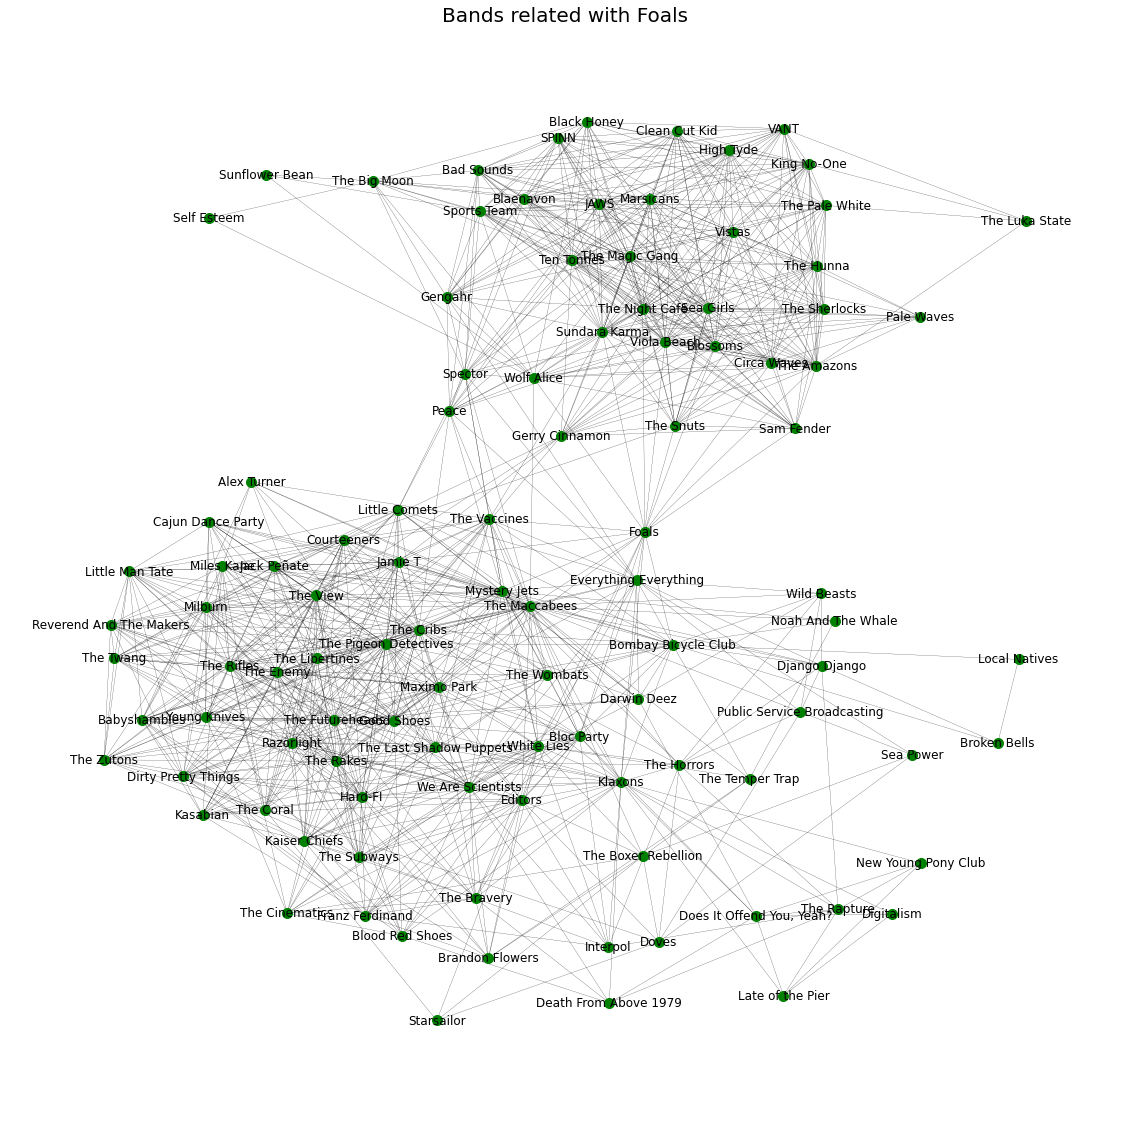

In [38]:
plt.figure(figsize=(20, 20))
plt.title("Bands related with Foals", fontsize = 20)
nx.draw(G, node_color = 'green', node_size = 100, pos = pos, width= 0.2, with_labels = True)
plt.show() 

### Network Characteristics

In [39]:
len(G.nodes)

105

In [40]:
len(G.edges)

993

In [41]:
av_short_path = nx.average_shortest_path_length(G)
av_short_path

2.3967032967032966

In [27]:
round(av_short_path, 2)

2.63

In [28]:
av_clust = nx.average_clustering(G)
av_clust

0.7368294680783923

In [29]:
round(av_clust, 2)

0.74

In [30]:
max_links = (len(G.nodes)*(len(G.nodes) - 1)) / 2
max_links

6105.0

In [31]:
density = 2*(len(G.edges)) / (len(G.nodes)*(len(G.nodes) - 1))
density

0.13464373464373464

In [32]:
av_degree = 2*(len(G.edges)) / (len(G.nodes))
av_degree

14.81081081081081

In [33]:
diameter = nx.diameter(G)
diameter

4

In [34]:
radius = nx.radius(G)
radius

2

In [35]:
center = nx.center(G)
len(center)

2

In [36]:
center

['Bizarrap', 'Neo Pistea']

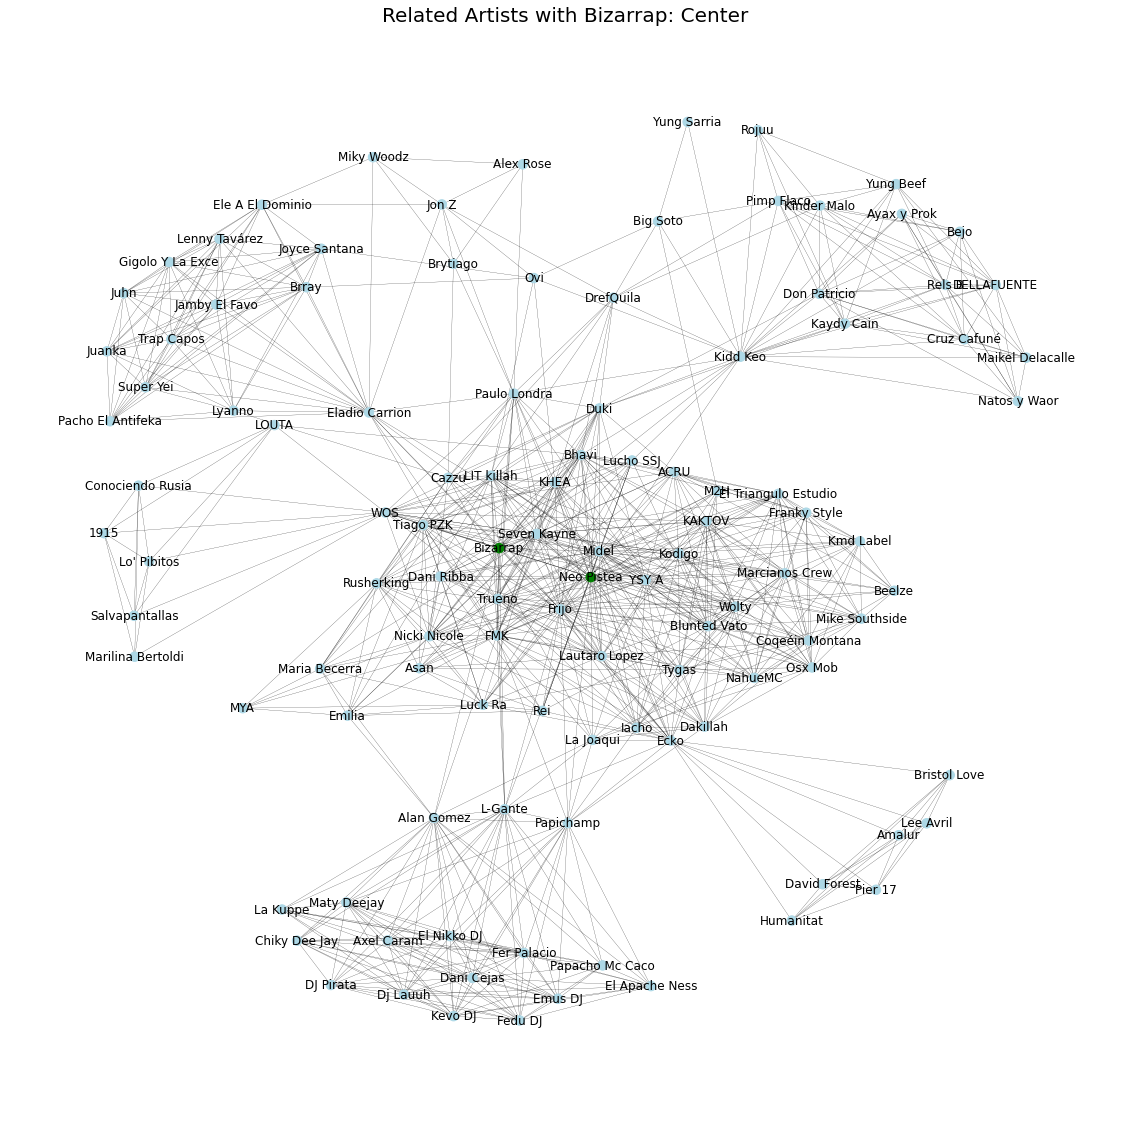

In [37]:
center_colors = ['green' if node in center else 'lightblue' for node in G.nodes]

plt.figure(figsize=(20, 20))
plt.title("Related Artists with Bizarrap: Center", fontsize = 20)
nx.draw(G, node_color = center_colors, node_size = 90, pos = pos, width= 0.2, with_labels = True)
plt.show()

In [38]:
per = nx.periphery(G)
len(per)

63

In [39]:
per

['Jamby El Favo',
 'Trap Capos',
 'Gigolo Y La Exce',
 'Lyanno',
 'Lenny Tavárez',
 'Juhn',
 'Brray',
 'Joyce Santana',
 'Jon Z',
 'Juanka',
 'Super Yei',
 'Pacho El Antifeka',
 'Ele A El Dominio',
 'Miky Woodz',
 'LOUTA',
 'Conociendo Rusia',
 'Marilina Bertoldi',
 '1915',
 "Lo' Pibitos",
 'Salvapantallas',
 'Beelze',
 'DrefQuila',
 'Ovi',
 'Emilia',
 'Maria Becerra',
 'MYA',
 'Kaydy Cain',
 'Don Patricio',
 'Axel Caram',
 'Maty Deejay',
 'Dani Cejas',
 'Kevo DJ',
 'Dj Lauuh',
 'Fer Palacio',
 'Fedu DJ',
 'La Kuppe',
 'Papacho Mc Caco',
 'Emus DJ',
 'Chiky Dee Jay',
 'El Nikko DJ',
 'El Apache Ness',
 'DJ Pirata',
 'Brytiago',
 'Alex Rose',
 'Humanitat',
 'David Forest',
 'Pier 17',
 'Amalur',
 'Lee Avril',
 'Bristol Love',
 'Pimp Flaco',
 'Kinder Malo',
 'DELLAFUENTE',
 'Yung Beef',
 'Cruz Cafuné',
 'Rels B',
 'Natos y Waor',
 'Ayax y Prok',
 'Big Soto',
 'Bejo',
 'Maikel Delacalle',
 'Rojuu',
 'Yung Sarria']

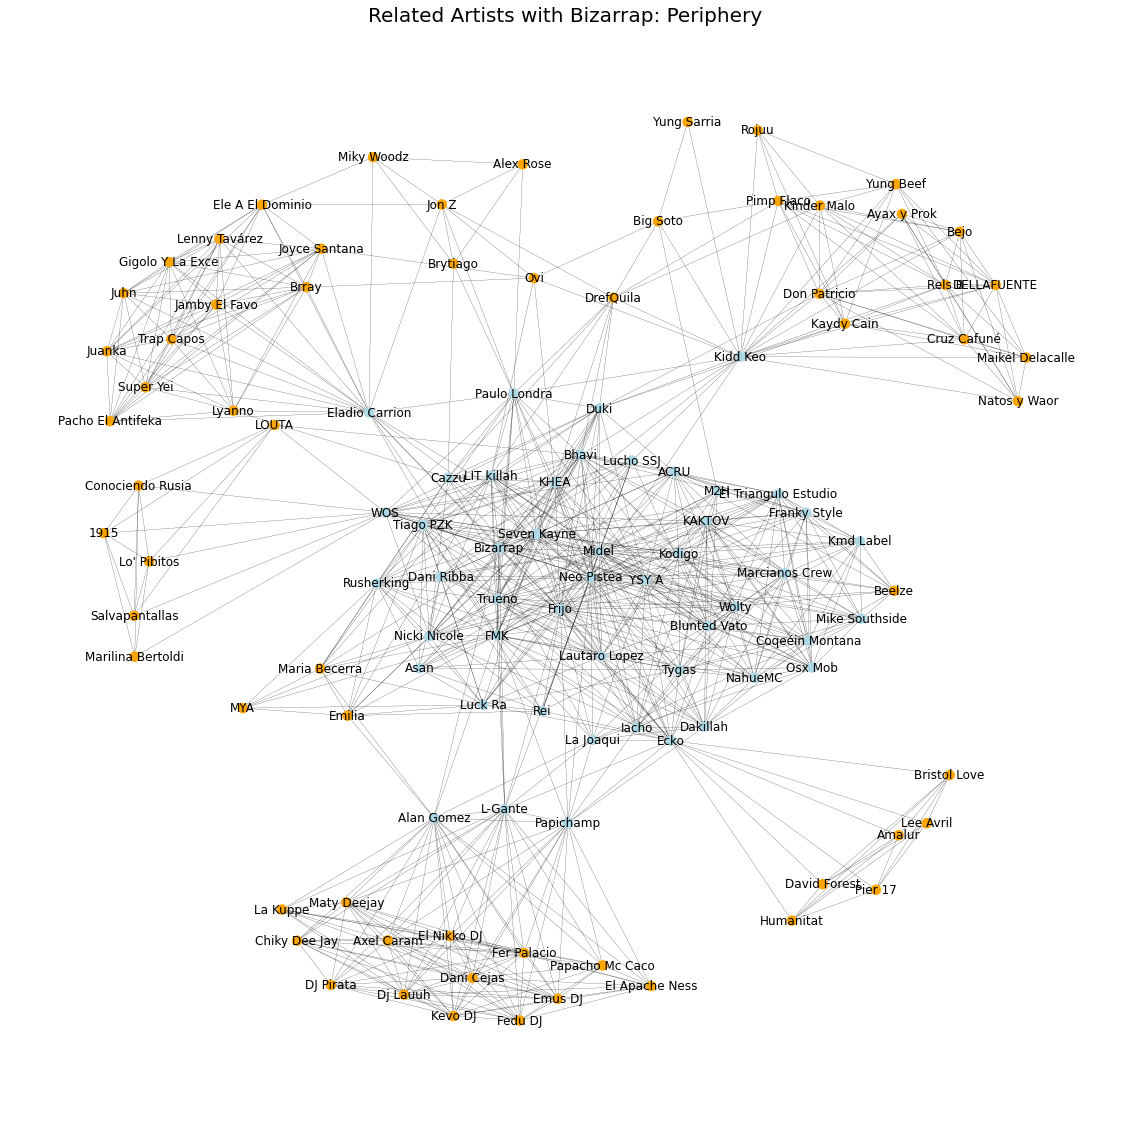

In [40]:
per_colors = ['orange' if node in per else 'lightblue' for node in G.nodes]

plt.figure(figsize=(20, 20))
plt.title("Related Artists with Bizarrap: Periphery", fontsize = 20)
nx.draw(G, node_color = per_colors, node_size = 90, pos = pos, width= 0.2, with_labels = True)
plt.show()

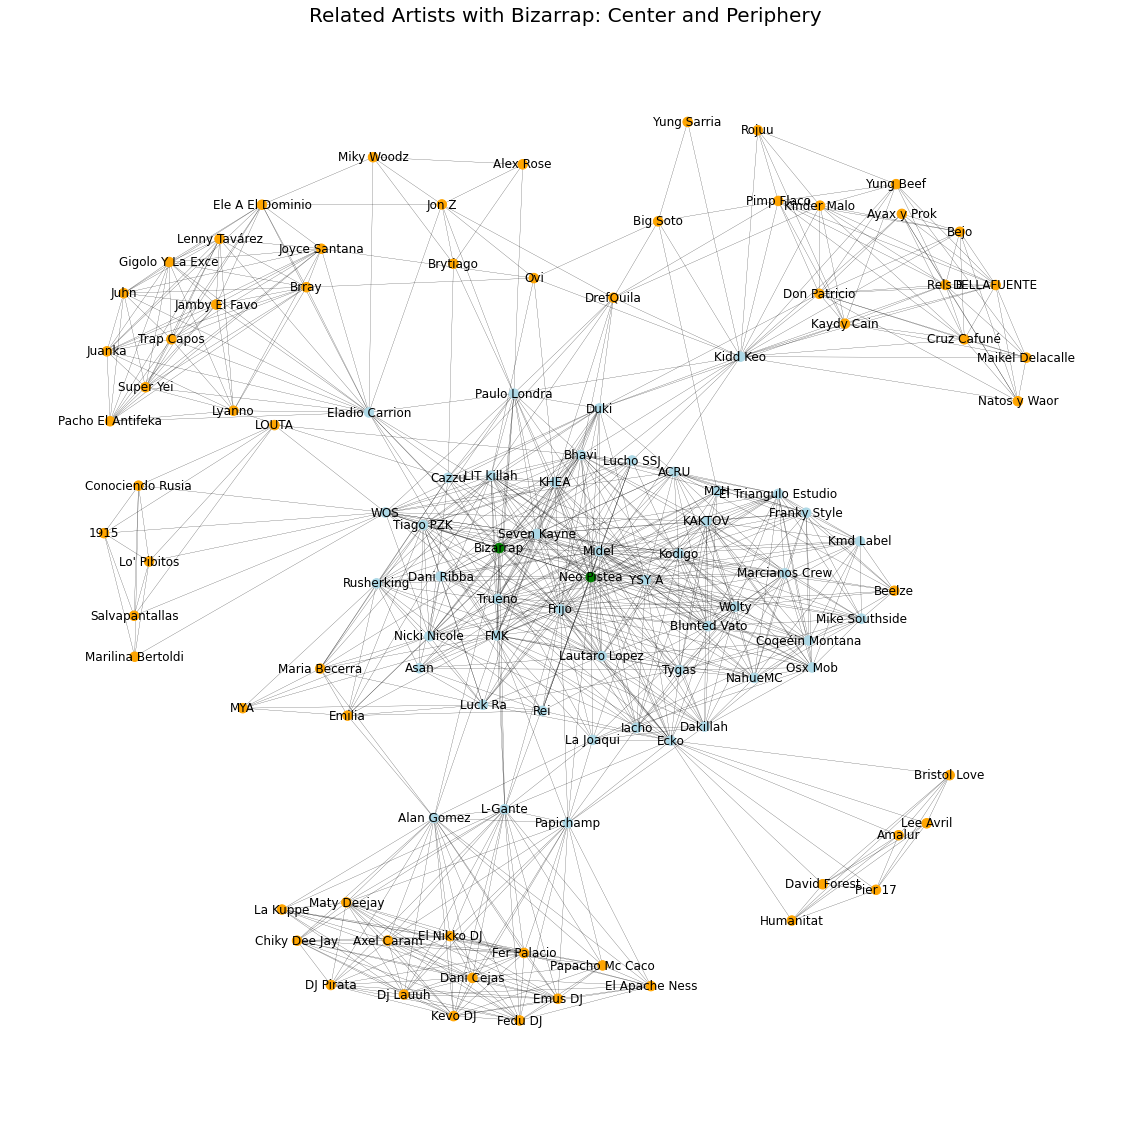

In [41]:
cenper_colors = ['orange' if node in per else 'green' if node in center else 'lightblue' for node in G.nodes]

plt.figure(figsize=(20, 20))
plt.title("Related Artists with Bizarrap: Center and Periphery", fontsize = 20)
nx.draw(G, node_color = cenper_colors, node_size = 90, pos = pos, width= 0.2, with_labels = True)
plt.show()

### Centrality Measure

In [42]:
degree = [] 
for node in G.nodes: 
    degree.append(G.degree(node))

max(degree)

45

In [43]:
min(degree)

2

In [44]:
max_degree = []
for node in G.nodes:
    if G.degree(node) == 45:
        max_degree.append(node)
        
max_degree

['Neo Pistea']

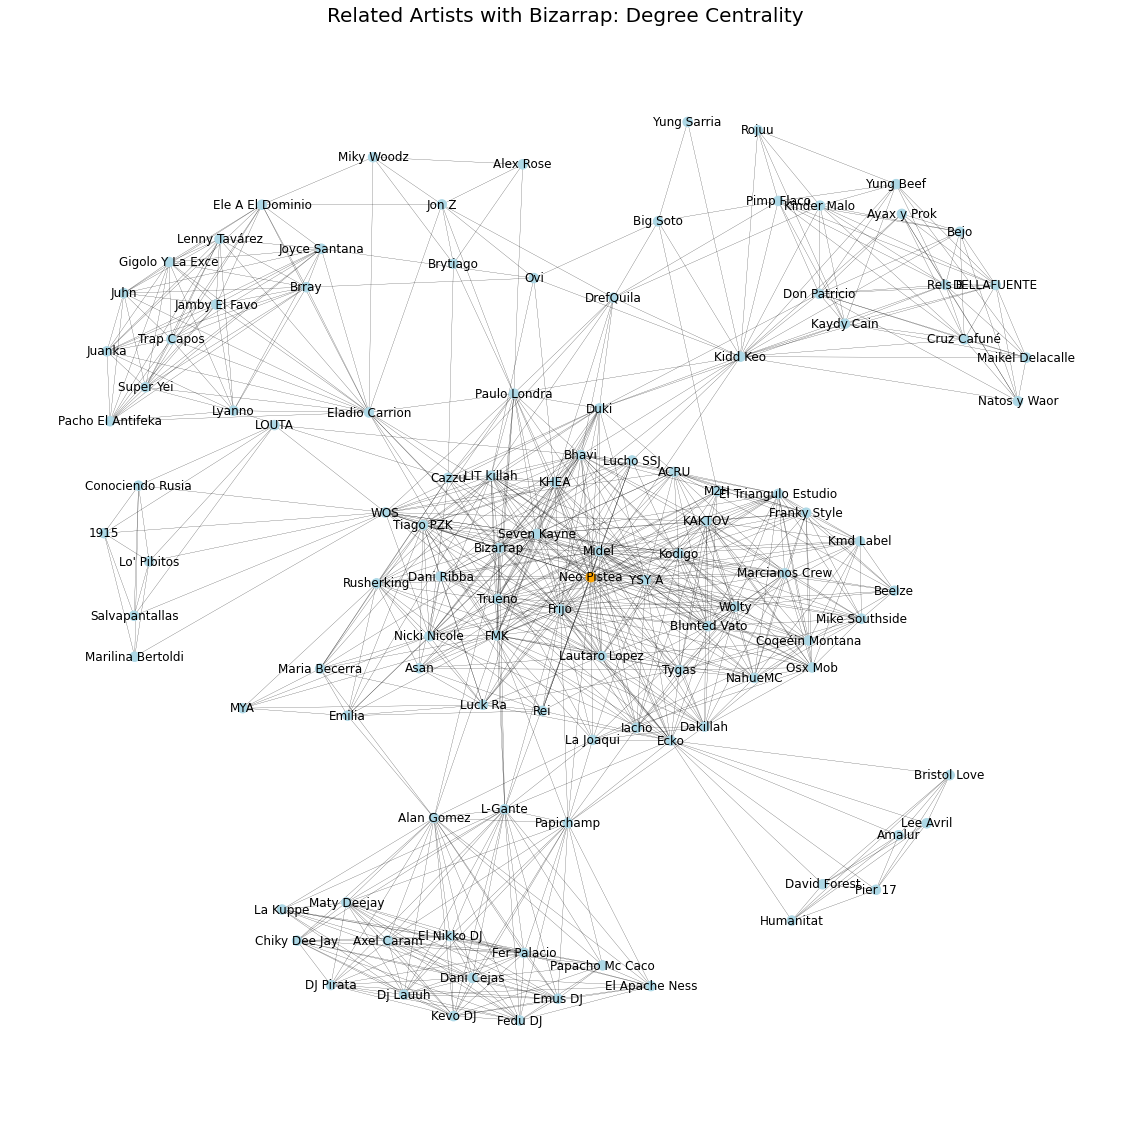

In [45]:
deg_colors = ['orange' if node in max_degree else 'lightblue' for node in G.nodes]

plt.figure(figsize=(20, 20))
plt.title("Related Artists with Bizarrap: Degree Centrality", fontsize = 20)
nx.draw(G, node_color = deg_colors, node_size = 90, pos = pos, width= 0.2, with_labels = True)
plt.show()

In [46]:
max_degree_centrality = max(degree) / (len(G.nodes) - 1)
max_degree_centrality

0.4090909090909091

In [47]:
closeness_centrality = nx.closeness_centrality(G)
cc = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
cc[0]

('Neo Pistea', 0.6285714285714286)

In [48]:
betweeness_centrality = nx.betweenness_centrality(G)
bc = sorted(betweeness_centrality.items(), key=lambda x: x[1], reverse=True)
bc[0]

('Kidd Keo', 0.1832288439138153)

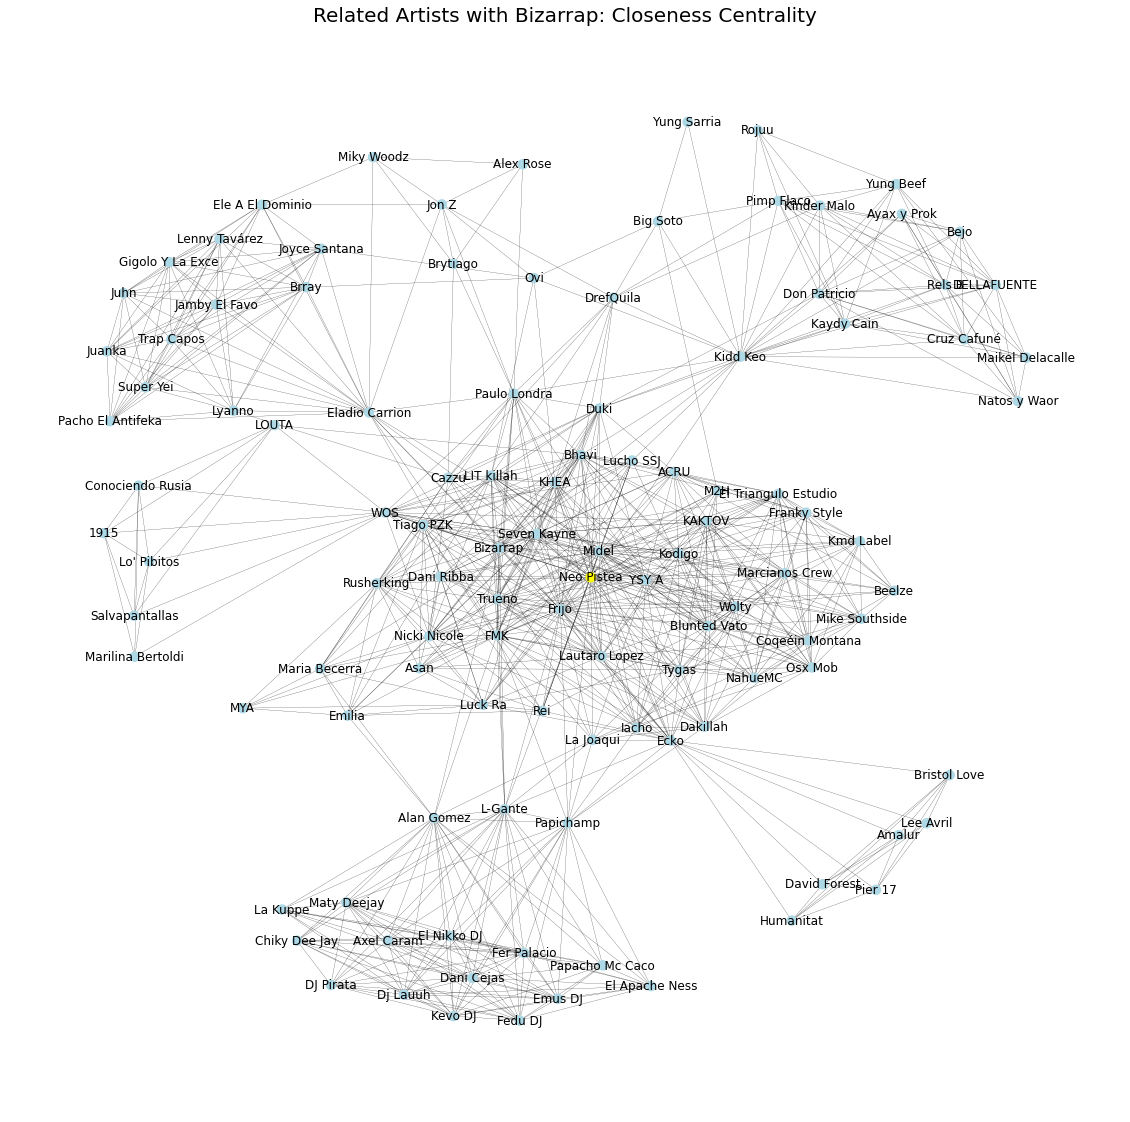

In [49]:
cbc_colors = ['yellow' if node == 'Neo Pistea' else 'lightblue' for node in G.nodes]

plt.figure(figsize=(20, 20))
plt.title("Related Artists with Bizarrap: Closeness Centrality", fontsize = 20)
nx.draw(G, node_color = cbc_colors, node_size = 90, pos = pos, width= 0.2, with_labels = True)
plt.show()

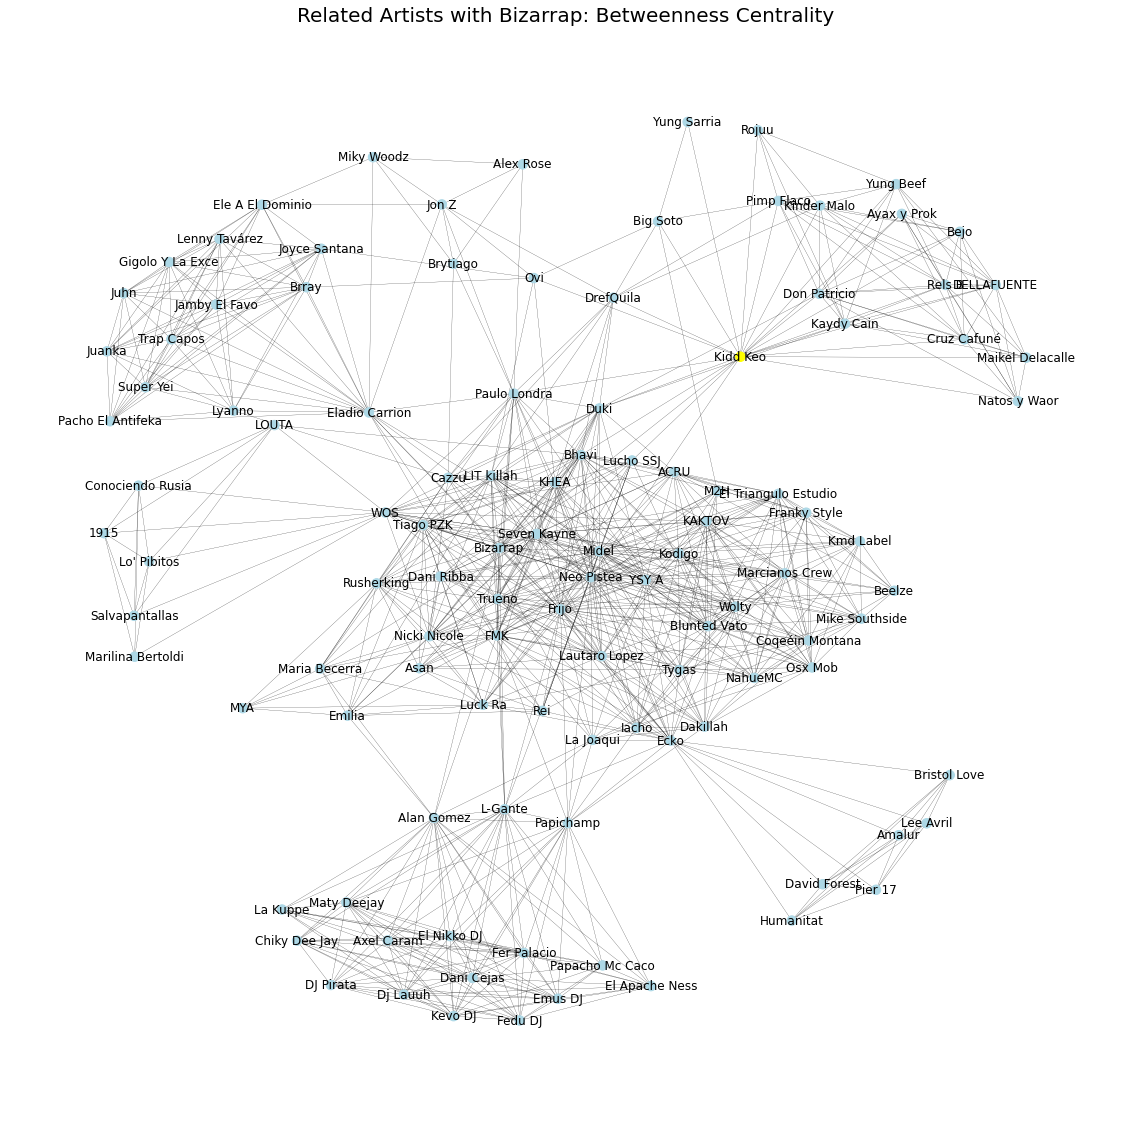

In [50]:
bbc_colors = ['yellow' if node == 'Kidd Keo' else 'lightblue' for node in G.nodes]

plt.figure(figsize=(20, 20))
plt.title("Related Artists with Bizarrap: Betweenness Centrality", fontsize = 20)
nx.draw(G, node_color = bbc_colors, node_size = 90, pos = pos, width= 0.2, with_labels = True)
plt.show()

### Degree Distribution

In [51]:
degree_sequence = [G.degree(node) for node in G.nodes]

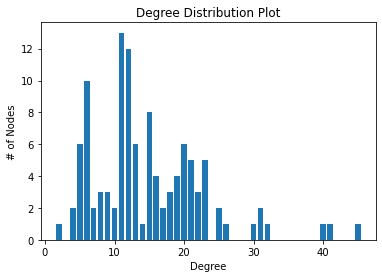

In [52]:
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree Distribution Plot")
plt.ylabel("# of Nodes")
plt.xlabel("Degree")
plt.show()

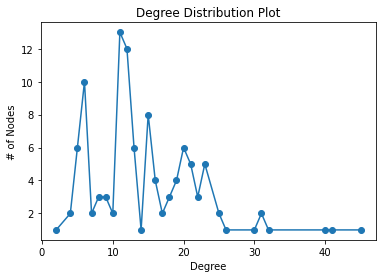

In [53]:
plt.plot(*np.unique(degree_sequence, return_counts=True), '-', marker = 'o')
plt.title("Degree Distribution Plot")
plt.ylabel("# of Nodes")
plt.xlabel("Degree")
plt.show()

### Community Detection

In [54]:
parts = nx.community.girvan_newman (G)
girv_new = max(parts, key = lambda p: nx.community.quality.modularity(G , p ))

In [55]:
len(girv_new)

6

In [56]:
modularity = nx.community.quality.modularity(G, girv_new)
modularity

0.5283253710314288

In [57]:
greed_mod = nx.community.greedy_modularity_communities(G)

In [58]:
len(greed_mod)

6

In [59]:
modularity2 = nx.community.quality.modularity(G, greed_mod)
modularity2

0.4729274335340189

In [60]:
kerni = nx.community.kernighan_lin_bisection(G)

In [61]:
len(kerni)

2

In [62]:
modularity3 = nx.community.quality.modularity(G, kerni)
modularity3

0.40759289845549096

In [63]:
partition_map = {}
for idx, cluster_nodes in enumerate(girv_new):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{'Ecko': 0,
 'Kodigo': 0,
 'Blunted Vato': 0,
 'MYA': 0,
 'Asan': 0,
 'Midel': 0,
 'KAKTOV': 0,
 'NahueMC': 0,
 'DrefQuila': 0,
 'Emilia': 0,
 'Maria Becerra': 0,
 'Coqeéin Montana': 0,
 'Wolty': 0,
 'Duki': 0,
 'LIT killah': 0,
 'Iacho': 0,
 'Kmd Label': 0,
 'Bhavi': 0,
 'Osx Mob': 0,
 'Rei': 0,
 'Nicki Nicole': 0,
 'Lucho SSJ': 0,
 'Lautaro Lopez': 0,
 'WOS': 0,
 'Marcianos Crew': 0,
 'Paulo Londra': 0,
 'FMK': 0,
 'ACRU': 0,
 'Franky Style': 0,
 'M2H': 0,
 'Seven Kayne': 0,
 'Luck Ra': 0,
 'YSY A': 0,
 'Beelze': 0,
 'Trueno': 0,
 'Tygas': 0,
 'Rusherking': 0,
 'El Triangulo Estudio': 0,
 'Cazzu': 0,
 'Dakillah': 0,
 'Mike Southside': 0,
 'Bizarrap': 0,
 'KHEA': 0,
 'La Joaqui': 0,
 'Neo Pistea': 0,
 'Tiago PZK': 0,
 'Frijo': 0,
 'Dani Ribba': 0,
 'Lyanno': 1,
 'Brytiago': 1,
 'Trap Capos': 1,
 'Pacho El Antifeka': 1,
 'Ovi': 1,
 'Brray': 1,
 'Joyce Santana': 1,
 'Jon Z': 1,
 'Ele A El Dominio': 1,
 'Alex Rose': 1,
 'Super Yei': 1,
 'Juanka': 1,
 'Eladio Carrion': 1,
 'Juhn': 1,
 'Gi

In [64]:
node_colors = [partition_map[node] for node in G.nodes]

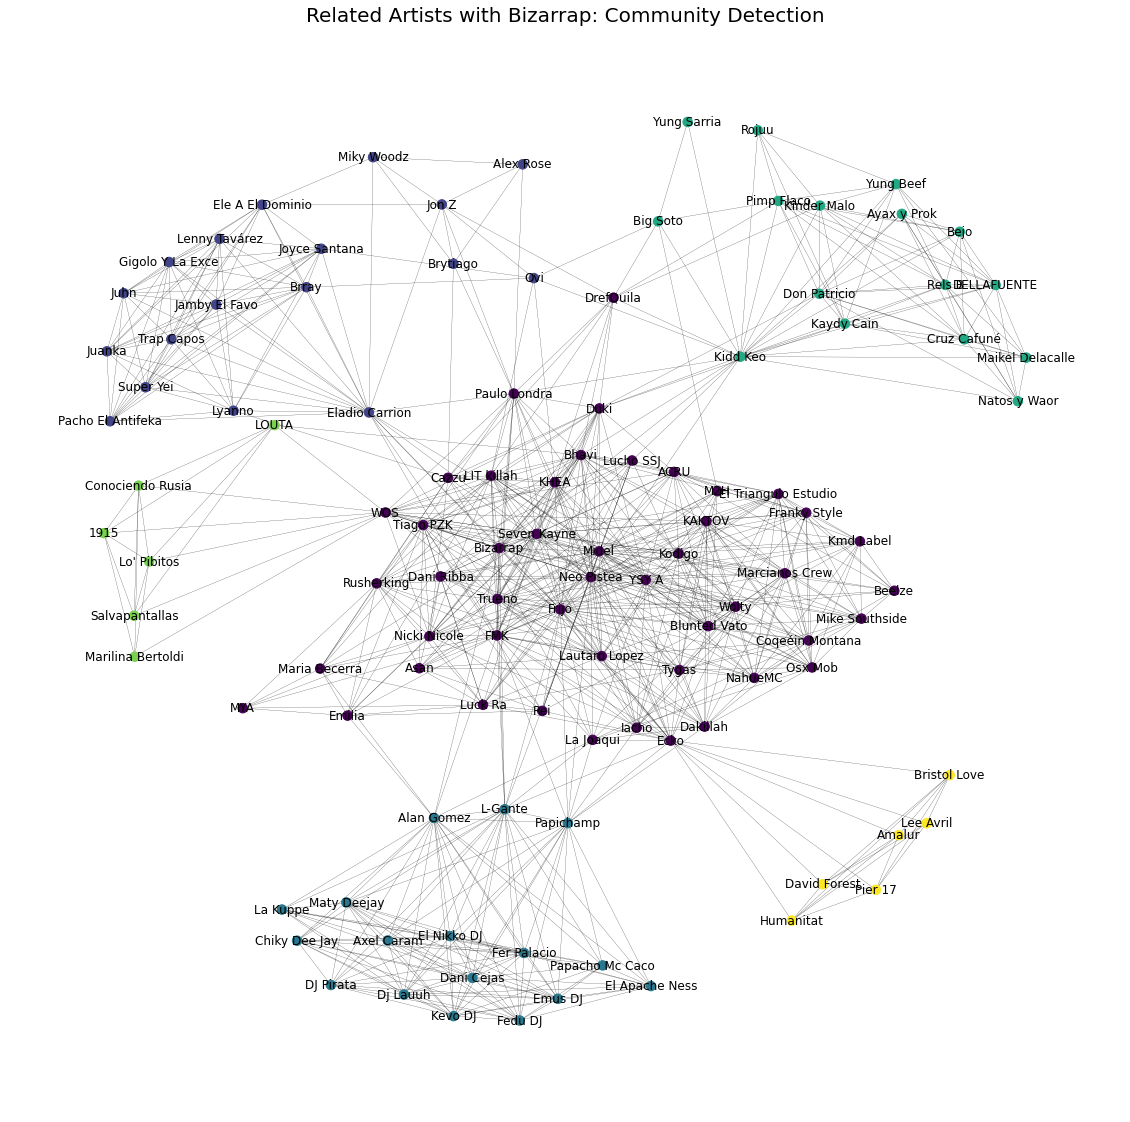

In [65]:
plt.figure(figsize=(20, 20))
plt.title("Related Artists with Bizarrap: Community Detection", fontsize = 20)
nx.draw(G, node_color = node_colors, node_size = 90, pos = pos, width= 0.2, with_labels = True)
plt.show()

In [66]:
preds = nx.jaccard_coefficient(G)

In [67]:
high_pred = []
for u, v, p in preds:
    if p > 0.7:
        high_pred.append([u, v])
        print(f"({u}, {v}) -> {p:.8f}")

(Axel Caram, El Apache Ness) -> 0.73333333
(Amalur, Lee Avril) -> 1.00000000
(Fer Palacio, Papacho Mc Caco) -> 0.73333333
(Juhn, Lyanno) -> 0.83333333
(Papacho Mc Caco, Dj Lauuh) -> 0.73333333
(Salvapantallas, Marilina Bertoldi) -> 0.80000000


In [68]:
high_pred[0]

['Axel Caram', 'El Apache Ness']

In [69]:
preds2 = nx.resource_allocation_index(G)

In [70]:
high_pred2 = []
for u, v, p in preds2:
    if p > 0.7:
        high_pred2.append([u, v])
        print(f"({u}, {v}) -> {p:.8f}")

(Luck Ra, FMK) -> 0.72761940
(Amalur, Lee Avril) -> 0.70512821
(Fer Palacio, Papacho Mc Caco) -> 0.71950640
(Ele A El Dominio, Lenny Tavárez) -> 0.70904096
(Ele A El Dominio, Pacho El Antifeka) -> 0.70904096
(Juhn, Lyanno) -> 0.79995005
(Papacho Mc Caco, Dj Lauuh) -> 0.71950640
(Tygas, YSY A) -> 0.70649471
(Frijo, Kodigo) -> 0.74909336
(YSY A, Kodigo) -> 0.89036320


In [71]:
preds3 = nx.adamic_adar_index(G)

In [72]:
high_pred3 = []
for u, v, p in preds3:
    if p > 5:
        high_pred3.append([u, v])
        print(f"({u}, {v}) -> {p:.8f}")

(Tygas, YSY A) -> 5.09790263
(Frijo, Kodigo) -> 5.42405918
(YSY A, Kodigo) -> 6.18011544


In [73]:
preds4 = nx.preferential_attachment(G)

In [74]:
high_pred4 = []
for u, v, p in preds4:
    if p > 900:
        high_pred4.append([u, v])
        print(f"({u}, {v}) -> {p:.8f}")

(Frijo, Kidd Keo) -> 920.00000000
(Midel, Kidd Keo) -> 943.00000000
(Midel, L-Gante) -> 943.00000000
(Alan Gomez, Neo Pistea) -> 945.00000000
